In [ ]:
'''
【项目06】  多场景下的图表可视化表达

课程数据：
2016年奥运运动员数据，数据格式为xlsx，分3个sheet

1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数

2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到

3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

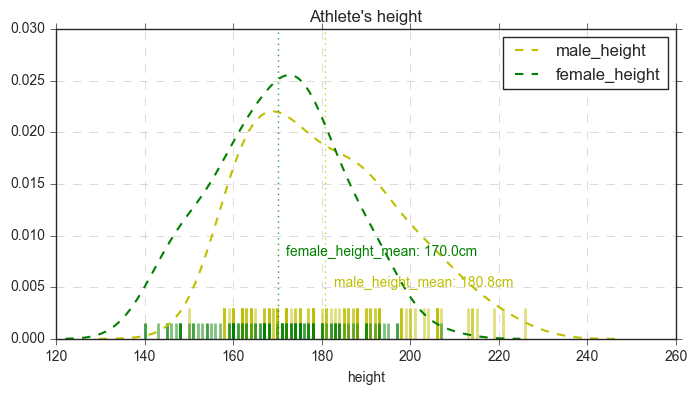

In [3]:
'''
1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数

'''

import os
os.chdir('C:\\Users\\acer\\Desktop\\')
# 创建工作路径

df = pd.read_excel('奥运运动员数据.xlsx',sheetname=1,header=0)
df_length = len(df)
df_columns = df.columns.tolist()
# 查看数据
# pd.read_excel → 读取excel文件，这里得到的是pandas的dataframe数据格式

data = df[['event','name','gender','height']]
data.dropna(inplace = True)   # 去掉缺失值
data_male = data[data['gender'] == '男']
data_female = data[data['gender'] == '女']
# 筛选数据，按照目标字段筛选
# 提取男女数据

hmean_male = data_male['height'].mean()
hmean_female = data_female['height'].mean()
# 计算男女平均身高

sns.set_style("ticks")
# 图表风格设置
# 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"

plt.figure(figsize = (8,4))  # 设置作图大小
sns.distplot(data_male['height'],hist = False,kde = True,rug = True,
             rug_kws = {'color':'y','lw':2,'alpha':0.5,'height':0.1} ,   # 设置数据频率分布颜色
             kde_kws={"color": "y", "lw": 1.5, 'linestyle':'--'},        # 设置密度曲线颜色，线宽，标注、线形
             label = 'male_height')
sns.distplot(data_female['height'],hist = False,kde = True,rug = True,
             rug_kws = {'color':'g','lw':2,'alpha':0.5} , 
             kde_kws={"color": "g", "lw": 1.5, 'linestyle':'--'},
             label = 'female_height')
# 绘制男女高度分布密度图

plt.axvline(hmean_male,color='y',linestyle=":",alpha=0.8) 
plt.text(hmean_male+2,0.005,'male_height_mean: %.1fcm' % (hmean_male), color = 'y')
# 绘制男运动员平均身高辅助线

plt.axvline(hmean_female,color='g',linestyle=":",alpha=0.8)
plt.text(hmean_female+2,0.008,'female_height_mean: %.1fcm' % (hmean_female), color = 'g')
# 绘制女运动员平均身高辅助线

plt.ylim([0,0.03])
plt.grid(linestyle = '--')     # 添加网格线
plt.title("Athlete's height")  # 添加图表名
# 图表其他内容

,index,event,name,arm/h,leg/h,BMI,age,BMI_assess,leg_assess,arm_assess,age_assess,BMI_nor,leg_nor,arm_nor,age_nor,final
0,211,diving,司雅杰,1.018293,0.573171,21.192742,18.0,0.807258,0.573171,0.018293,18.0,0.960998,0.708243,0.872713,0.916667,0.864655
1,188,diving,曹缘,1.017964,0.556886,22.230987,17.0,0.230987,0.556886,0.017964,17.0,0.989193,0.614134,0.875000,0.958333,0.859165
2,104,boxing,于丰铠,1.005181,0.585492,24.430186,21.0,2.430186,0.585492,0.005181,21.0,0.881594,0.779450,0.963946,0.791667,0.854164
3,7,fencing,许安琪,0.972678,0.612022,22.395413,24.0,0.395413,0.612022,0.027322,24.0,0.981148,0.932766,0.809882,0.666667,0.847616
4,199,diving,张雁全,1.000000,0.537975,20.829995,18.0,1.170005,0.537975,0.000000,18.0,0.943250,0.504843,1.000000,0.916667,0.841190
5,152,swim,沈铎,1.027473,0.571429,20.830818,19.0,1.169182,0.571429,0.027473,19.0,0.943291,0.698175,0.808837,0.875000,0.831326
6,147,swim,傅园慧,1.016949,0.570621,20.109164,20.0,1.890836,0.570621,0.016949,20.0,0.907983,0.693511,0.882062,0.833333,0.829222
7,31,weightlifting,李雪英,1.000000,0.556250,23.046875,22.0,1.046875,0.556250,0.000000,22.0,0.949275,0.610457,1.000000,0.750000,0.827433
8,213,diving,刘蕙瑕,1.006369,0.554140,19.473407,19.0,2.526593,0.554140,0.006369,19.0,0.876877,0.598264,0.955679,0.875000,0.826455
9,66,basketball,赵继伟,1.000000,0.540541,22.205990,21.0,0.205990,0.540541,0.000000,21.0,0.990416,0.519672,1.000000,0.791667,0.825439


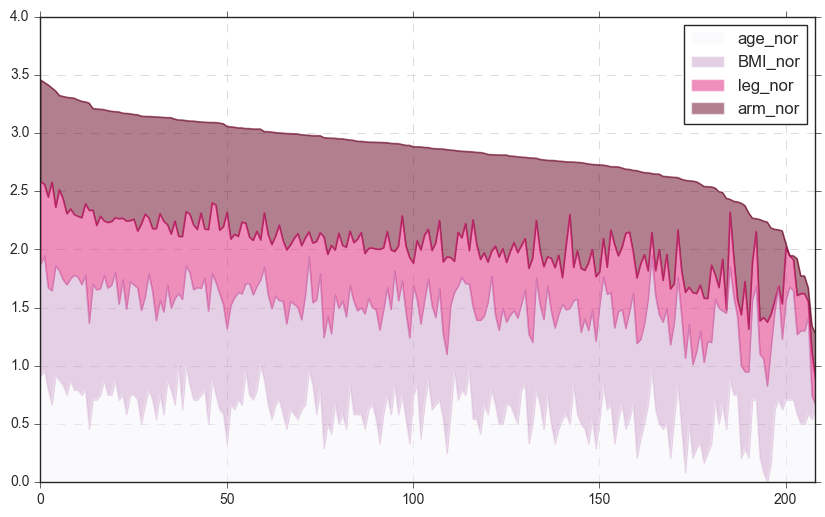

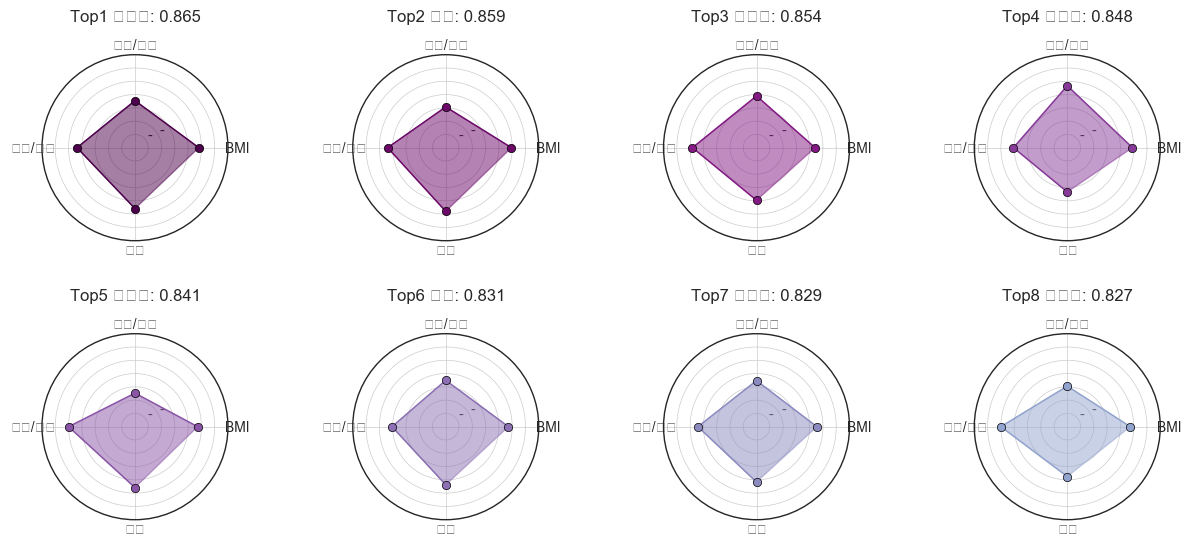

In [11]:
'''
2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到

'''

import os
os.chdir('C:\\Users\\acer\\Desktop\\')
# 创建工作路径

df = pd.read_excel('奥运运动员数据.xlsx',sheetname=1,header=0)
df_length = len(df)
df_columns = df.columns.tolist()
# 查看数据
# pd.read_excel → 读取excel文件，这里得到的是pandas的dataframe数据格式

'''
(1) 分析运动员全样本数据的身材分布情况
'''

data = df[['event','name','birthday','height','arm','leg','weight','age']]
data.dropna(inplace = True)   # 去掉缺失值
# 筛选数据，按照目标字段筛选

data['BMI'] = data['weight']/(data['height']/100)**2   
# 求BMI

data['arm/h'] = data['arm'] / data['height']
data['leg/h'] = data['leg'] / data['height']
data = data[data['leg/h']<0.7]
data = data[data['arm/h']>0.7]

# 分别计算“臂展/身高”、“腿长/身高”，并删除异常数据

data_re = data[['event','name','arm/h','leg/h','BMI','age']]
# 重新新建结果数据data_re

data_re['BMI_assess'] = np.abs(data['BMI'] - 22)   # BMI评估 → 最接近22，差值绝对值越小分数越高
data_re['leg_assess'] = data['leg/h']              # 腿长评估 → 与身高比值，越大分数越高
data_re['arm_assess'] = np.abs(data['arm/h'] - 1)  # 手长评估 → 与身高比值最接近1，差值绝对值越小分数越高
data_re['age_assess'] = data['age']                # 年龄评估 → 最小，越小分数越高

data_re['BMI_nor'] = (data_re['BMI_assess'].max() - data_re['BMI_assess'])/(data_re['BMI_assess'].max()-data_re['BMI_assess'].min())
data_re['leg_nor'] = (data_re['leg_assess'] - data_re['leg_assess'].min())/(data_re['leg_assess'].max()-data_re['leg_assess'].min())              
data_re['arm_nor'] = (data_re['arm_assess'].max() - data_re['arm_assess'])/(data_re['arm_assess'].max()-data_re['arm_assess'].min()) 
data_re['age_nor'] = (data_re['age_assess'].max() - data_re['age_assess'])/(data_re['age_assess'].max()-data_re['age_assess'].min())
# 标准化

data_re['final'] = (data_re['BMI_nor']+data_re['leg_nor']+data_re['arm_nor']+data_re['age_nor'])/4
# 计算总体评价结果

plt.figure(figsize = (10,6))
data_re.sort_values(by = 'final',inplace = True,ascending=False)
data_re.reset_index(inplace=True)
# 排序并重新设定index

data_re[['age_nor','BMI_nor','leg_nor','arm_nor']].plot.area(colormap = 'PuRd',alpha = 0.5,figsize = (10,6))
plt.ylim([0,4])
plt.grid(linestyle = '--')
# 绘制运动员身材数据分布图表


'''
(2) 解读身材最好的前8位运动员
'''

datatop8 = data_re[:8]
# 数据筛选

fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(wspace=0.35,hspace=0.5)

n = 0
for i in datatop8['name'].tolist():
    n += 1
    c = plt.cm.BuPu_r(np.linspace(0, 0.7,10))[n-1]
    axi = plt.subplot(2,4,n, projection = 'polar')
    datai = datatop8[['BMI_nor','leg_nor','arm_nor','age_nor']][datatop8['name']==i].T
    scorei = datatop8['final'][datatop8['name']==i]
    angles = np.linspace(0, 2*np.pi, 4, endpoint=False)
    #axi.plot(angles,datai,linestyle = '-',lw=1,color = c)
    plt.polar(angles, datai, 'o-', linewidth=1,color = c)
    axi.fill(angles,datai,alpha=0.5,color=c)
    axi.set_thetagrids(np.arange(0.0, 360.0, 90),['BMI','腿长/身高','臂长/身高','年龄'])
    axi.set_rgrids(np.arange(0.2,1.5,0.2),'--')
    plt.title('Top%i %s: %.3f\n' %(n,i,scorei))
# 分别绘制每个运动员的评分雷达图
data_re

In [12]:
'''
3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色

'''

df = pd.read_excel('奥运运动员数据.xlsx',sheetname=2,header=0)
df_length = len(df)
df_columns = df.columns.tolist()
# 查看数据
# pd.read_excel → 读取excel文件，这里得到的是pandas的dataframe数据格式

df.replace([np.nan,'无数据','无贴吧'],0,inplace=True)
# 数据清洗

df['n1'] = (df['cp微博数量']-df['cp微博数量'].min())/(df['cp微博数量'].max()-df['cp微博数量'].min())
df['n2'] = (df['cp微博话题阅读量']-df['cp微博话题阅读量'].min())/(df['cp微博话题阅读量'].max()-df['cp微博话题阅读量'].min())
df['n3'] = (df['B站cp视频播放量']-df['B站cp视频播放量'].min())/(df['B站cp视频播放量'].max()-df['B站cp视频播放量'].min())
df['f'] = df['n1']*0.5 + df['n2']*0.3 + df['n3']*0.2
# 计算综合热度

df.sort_values(by = 'f',inplace = True,ascending=False)
df.reset_index(inplace=True)
print(df.head())
# 数据重新排序

result = df[['p1','p2','f']]
writer = pd.ExcelWriter('output.xlsx')
result.to_excel(writer,'sheet1')
writer.save()
# 数据导出excel文件

   index   p1   p2 p2来源   cp微博数量  cp微博话题阅读量  B站cp视频播放量        n1        n2  \
0     13  福原爱  张怡宁  体育圈  1721063    4116000    1345361  1.000000  0.029400   
1     16   孙杨  朴泰桓  体育圈  1016135   35601000     242000  0.590411  0.254293   
2     19   孙杨  傅园慧  体育圈  1214140    1842000       8678  0.705459  0.013157   
3     31   林丹  李宗伟  体育圈   732829   59716000      38000  0.425800  0.426543   
4     26  宁泽涛  孙妍在  体育圈      897  140000000      33000  0.000521  1.000000   

         n3         f  
0  1.000000  0.708820  
1  0.179877  0.407469  
2  0.006450  0.357967  
3  0.028245  0.346512  
4  0.024529  0.305166  
